# Lecture 5 - Testing and Debugging (Chapter 6, McClarren)

## Testing Your Code

It is on you, the code writer, to ensure that your code accomplishes the desired task, and over a range of possible applications.  Robust code is good code.

Testing is necessary when
1. The code will be used by somebody else;
2. The code will be used to be input for another piece of code (e.g., a function that calls
another function);
3. The code will be used to make a decisions, or
4. The code will be turned in as a class assignment.

As an example of the importance of testing, suppose we develop a code that calculates the multiplication factor for the simple case of a bare, homogeneous, one-group multiplying medium:

$$k_{eff} = k_{\infty} \frac{1}{1+L^2 B_g^2} $$

where 

$$ k_{\infty} = \frac{\nu \Sigma_f}{\Sigma_a} ,$$

and

$$ L^2 = \frac{D}{\Sigma_a}, $$

and if the reactor is a slab, then

$$ B_g^2 = {\left(\frac{\pi}{X}\right)}^2 . $$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
def k_effective(slab_length, nuSigma_f, Sigma_a, Diff_coef):
    """ Computes the eigenvalue (k-effective) for a slab reactor
    Args:
        slab_length: the length of the slab
        nuSigma_f: value of nu * the macro. fission x-section
        Sigma_a: value of the macro. absorption x-section
        Diff_coef: the diffusion coefficient
    Returns:
        The value of k-effective
    """
    import numpy as np
    k_infinity = nuSigma_f / Sigma_a #k-infinity
    L = Diff_coef/Sigma_a #Diffusion length
    B = np.pi/slab_length #geometric buckling.
    k = k_infinity/(1+L**2 * B**2)
    return k

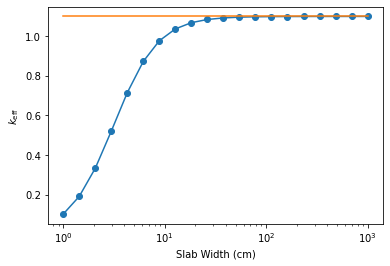

In [2]:
#20 points from 10^0 to 10^3
lengths = np.logspace(0,3,20)
nuSigma_f = 1.1
Sigma_a = 1.0
Diff_coef = 1.0
k_vector = k_effective(lengths, nuSigma_f,
                       Sigma_a, Diff_coef)
plt.semilogx(lengths,k_vector,"o-")
plt.semilogx(lengths,nuSigma_f/Sigma_a*np.ones(20))
plt.xlabel("Slab Width (cm)")
plt.ylabel("$k_\mathrm{eff}$")
plt.show()

In [3]:
test_k = k_effective(slab_length = np.pi, nuSigma_f = 1,
Sigma_a = 1, Diff_coef = 1)
if np.fabs(test_k - 0.5) < 1.0e-8:
    print("The test passed, k =",test_k)
else:
    print("Test failed, you should probably",
          "fix the code, k =", test_k)

The test passed, k = 0.5


Try again, different problem...

In [4]:
test_k = k_effective(slab_length = np.pi, nuSigma_f = 1,
Sigma_a = 1, Diff_coef = 2)
kinf = 1.0
if np.fabs(test_k - 1.0/3.0) < 1.0e-8:
    print("The test passed, k =",test_k)
else:
    print("Test failed, you should probably",
          "fix the code, k =", test_k)

Test failed, you should probably fix the code, k = 0.2


Hmmm....  There's something wrong here.  This is a _covert_ bug (found only through testing...).  

## Debugging

Our existing code has a bug.  Here is the fixed code - it's hard to see what was wrong in the initial version:

In [5]:
import numpy as np
def k_effective(slab_length, nuSigma_f, Sigma_a, Diff_coef):
    """ Computes the eigenvalue (k-effective) for a slab reactor
    Args:
        slab_length: the length of the slab
        nuSigma_f: value of nu * the macro. fission x-section
        Sigma_a: value of the macro. absorption x-section
        Diff_coef: the diffusion coefficient
    Returns:
        The value of k-effective
    """
    k_infinity = nuSigma_f / Sigma_a #k-infinity
    L2 = Diff_coef/Sigma_a #Diffusion length
    B = np.pi/slab_length #geometric buckling.
    k = k_infinity/(1+L2 * B**2)
    return k

In [6]:
test_k = k_effective(slab_length = np.pi, nuSigma_f = 1,
Sigma_a = 1, Diff_coef = 2)
kinf = 1.0
if np.fabs(test_k - 1.0/3.0) < 1.0e-8:
    print("The test passed, k =",test_k)
else:
    print("Test failed, you should probably",
          "fix the code, k =", test_k)

The test passed, k = 0.3333333333333333


## What do we learn about debugging through this example?

1. One test is generally not sufficient to find bugs.
2. Debugging is a mindset.  You need to think critically about what the code is supposed to be doing, what the value of each variable is after each executable statement and what it _should_ be.
3. Comments can be very important because the _intent_ of the code can be documented by the developer.

There is no simple recipe for debugging.  Experience is very valuable, because errors made in code often repeat.  The value of experience becomes apparent when a novice programmer presents code with an error to an instructor or another expert. Sometimes without even looking at the code, the expert can identify the problem based on the described behavior. Such an occurrence can cause the novice programmer to despair that he or she “will never be that good”, or some other self-defeating watchword. Typically, the expert can diagnose the problem so quickly
because of that expert’s past mistakes.

## Useful questions to ask in debugging:

1. How is the code failing?
2. What is the code doing correctly?
3. What pieces of the code are most likely to have an error?

Your best tool for debugging will be the print() statement.  For example, if there is a mistake in a formula you could print out the result and compare it with a hand calculation.

Other tools can be used, including a built-in debugger.  Debuggers allow you to set breakpoints and then to observe the value of different variables, and watch how they change as the code executes.  

## Assertions

With the $\texttt{assert}$ statement, you can check assumptions that are embedded in your code. The
assert statement takes an expression as input. If the expression evaluates to true, then the
assert does nothing. However, if the expression evaluates to false, an error is thrown and
the code stops executing.



In [7]:
test_k = k_effective(slab_length = np.pi, nuSigma_f = 1,
                     Sigma_a = -2, Diff_coef = 1)
print("With negative Sigma_a, k =", test_k)

With negative Sigma_a, k = -1.0


In [8]:
test_k = k_effective(slab_length = np.pi, nuSigma_f = 1,
                     Sigma_a = -1, Diff_coef = 1)
print("With negative Sigma_a, k =", test_k)

ZeroDivisionError: float division by zero

In [9]:
import numpy as np
def k_effective(slab_length, nuSigma_f, Sigma_a, Diff_coef):
    assert (slab_length > 0)
    assert (nuSigma_f > 0)
    assert (Sigma_a > 0)
    assert (Diff_coef > 0)
    k_infinity = nuSigma_f / Sigma_a #k-infinity
    L2 = Diff_coef/Sigma_a #Diffusion length
    B = np.pi/slab_length #geometric buckling.
    k = k_infinity/(1+L2 * B**2)
    return k

In [10]:
test_k = k_effective(slab_length = np.pi, nuSigma_f = 1,
                     Sigma_a = -1, Diff_coef = 1)
print("With negative Sigma_a, k =", test_k)

AssertionError: 

In [11]:
import numpy as np
def k_effective(slab_length, nuSigma_f, Sigma_a, Diff_coef):
    assert (slab_length > 0)
    assert (nuSigma_f > 0)
    assert (Sigma_a > 0)
    assert (Diff_coef > 0)
    k_infinity = nuSigma_f / Sigma_a #k-infinity
    L2 = Diff_coef/Sigma_a #Diffusion length
    B = np.pi/slab_length #geometric buckling.
    k = k_infinity/(1+L2 * B**2)
    assert k >= 0
    assert k <= k_infinity
    return k

## Error Handling

There are times when you want to handle an error so that either the program can continue
or print a useful error message before exiting. Error handling can make debugging and finding errors in code easier. Additionally, we can use error handling to help us execute tests of our code.  

Error handling is also called exception handling.  We can place some code in a special block of code called a $\texttt{try}$ block. 

We'll consider a specific example: a ZeroDivisionError.  Let's see what it looks like:


In [12]:
z = 10.5/0

ZeroDivisionError: float division by zero

This is an "uncaught" exception, and the code stops.  Let's try to catch it so the code can proceed...


In [13]:
try:
    z = 10.5/0
except ZeroDivisionError:
    print("You cannot divide by 0")

You cannot divide by 0


Sometimes you want to continue on after catching an exception, other times you want to print a useful error message and then terminate execution.

In [14]:
try:
    z = 10.5/0
except ZeroDivisionError:
    print("You cannot divide by 0, exiting")
    raise

You cannot divide by 0, exiting


ZeroDivisionError: float division by zero

Let's go back to our code that calculates the multiplication factor...

In [15]:
import numpy as np
def k_effective(slab_length, nuSigma_f, Sigma_a, Diff_coef):
    try:
        assert (slab_length >0)
        assert (nuSigma_f > 0)
        assert (Sigma_a >0)
        assert (Diff_coef > 0)
    except AssertionError:
        print("Input Parameters are not all positive.")
        print("slab_length =",slab_length)
        print("nuSigma_f =",nuSigma_f)
        print("Sigma_a =",Sigma_a)
        print("Diff_coef =",Diff_coef)
        raise
    except:
        print("An unexpected error occurred when",
              "checking the function parameters")
        raise
    k_infinity = nuSigma_f / Sigma_a #k-infinity
    L2 = Diff_coef/Sigma_a #Diffusion length
    B = np.pi/slab_length #geometric buckling.
    k = k_infinity/(1+L2 * B**2)
    assert k >= 0
    assert k <= k_infinity
    return k

In [16]:
test_k = k_effective(slab_length = np.pi, nuSigma_f = 1,
                     Sigma_a = -1, Diff_coef = 1)

Input Parameters are not all positive.
slab_length = 3.141592653589793
nuSigma_f = 1
Sigma_a = -1
Diff_coef = 1


AssertionError: 

In [17]:
test_k = k_effective(slab_length = "Pi", nuSigma_f = 1,
                     Sigma_a = -1, Diff_coef = 1)

An unexpected error occurred when checking the function parameters


TypeError: '>' not supported between instances of 'str' and 'int'